In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

In [2]:
df.columns

Index(['district', 'price', 'state_construction', 'living_area', 'bedrooms',
       'bathrooms', 'has_garden', 'kitchen', 'fireplace', 'swimmingpool',
       'has_terrace', 'has_attic', 'has_basement', 'epc', 'area_total'],
      dtype='object')

In [3]:


# Assuming 'data' is your DataFrame and 'district' is the categorical column
# Create a one-hot encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'district' column and create a new DataFrame with these columns
district_encoded = encoder.fit_transform(df[['district']])
district_encoded_df = pd.DataFrame(
    district_encoded, columns=encoder.get_feature_names_out(['district']))

# Concatenate the new one-hot encoded DataFrame with the original DataFrame (minus the 'district' column)
data_numeric = df.drop('district', axis=1)
data_encoded = pd.concat([data_numeric, district_encoded_df], axis=1)

In [4]:
data_encoded.isnull().sum()

price                         0
state_construction            0
living_area                   0
bedrooms                      0
bathrooms                     0
has_garden                    0
kitchen                       0
fireplace                     0
swimmingpool                  0
has_terrace                   0
has_attic                     0
has_basement                  0
epc                           0
area_total                    0
district_aalst                0
district_antwerp              0
district_arlon                0
district_ath                  0
district_bastogne             0
district_brugge               0
district_brussels             0
district_charleroi            0
district_dendermonde          0
district_diksmuide            0
district_dinant               0
district_eeklo                0
district_gent                 0
district_halle-vilvoorde      0
district_hasselt              0
district_huy                  0
district_ieper                0
district

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Selecting features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
degree = 2  # Choose the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R^2: {r2}')

MSE: 12919566202.444344, R^2: 0.5667718086499576


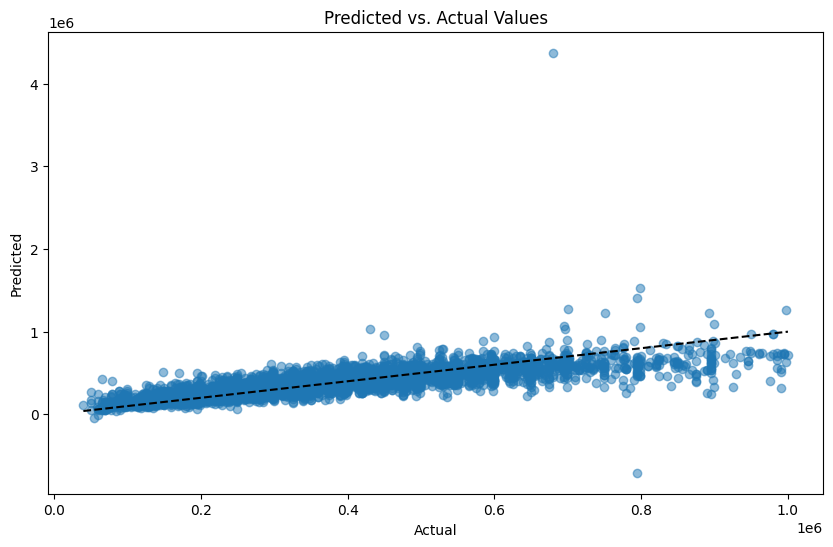

In [13]:
import matplotlib.pyplot as plt

# Plotting Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.show()

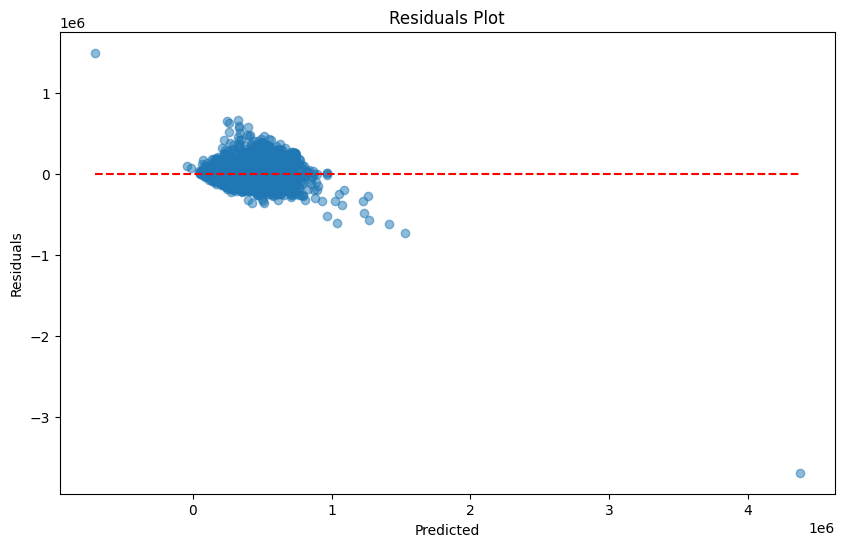

In [11]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(),
           colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()